## Biodiversity of Endangered Species in National Parks

#### Introduction:

- Describe the data set and prior cleaning, including modes/averages/histograms, counts of species within categories,
- Describe analysis and conclusions. 
- Focus on most interesting conclusion/finding

In [41]:
#import py libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from scipy import stats
#set options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [42]:
biodiv = pd.read_csv("biodiversity_data.csv")
print(biodiv.columns)
print(biodiv.info())
print(biodiv.describe(include='all'))
print(biodiv.head())

Index(['scientific_name', 'park_name', 'observations', 'category', 'conservation_status', 'common_names'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22164 entries, 0 to 22163
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      22164 non-null  object
 1   park_name            22164 non-null  object
 2   observations         22164 non-null  int64 
 3   category             22164 non-null  object
 4   conservation_status  22164 non-null  object
 5   common_names         22164 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB
None
       scientific_name park_name  observations        category conservation_status        common_names
count            22164     22164  22164.000000           22164               22164               22164
unique            5541         4           NaN               7                   5                5236
top      Abie

- Identifiers: scientific name, common names
- Categorical variables: park_name, category, conservation status
- Quatitative variables: observations


Since all species apart from those in the 'Least concern' conservation status are in a protected group, we can create a new column protection_listing that is binomial for the 'conservation_status' variable where 0 is 'Least Concern', and all other values are 1, ('Species of Concern', 'Threatened', 'Endangered', 'In Recovery')

In [43]:
#the protection listing of a species can be thought of as an binomial variable where species of Least Concern: 0 and protection listed classes: 1. 
protected_class = {'Least Concern': 0, 'Species of Concern': 1, 'In Recovery': 1, 'Threatened':1, 'Endangered':1}
biodiv['protection_listing'] = biodiv['conservation_status'].apply(lambda x: protected_class.get(x))
print(biodiv.describe())

       observations  protection_listing
count  22164.000000        22164.000000
mean     149.450866            0.032305
std       81.206840            0.176812
min        9.000000            0.000000
25%       88.000000            0.000000
50%      129.000000            0.000000
75%      217.000000            0.000000
max      805.000000            1.000000


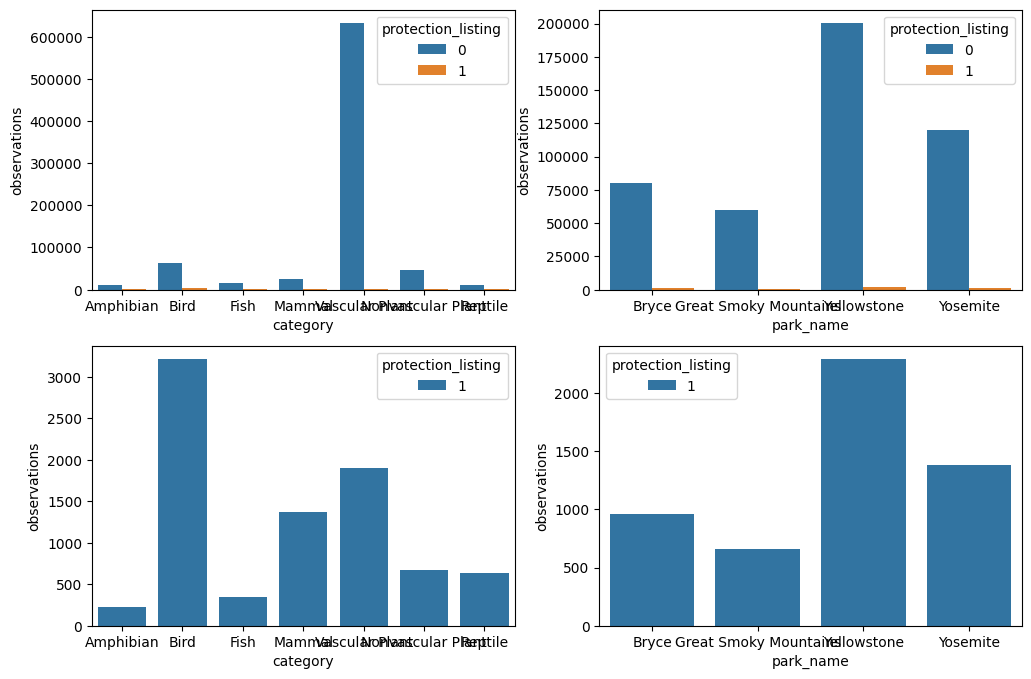

In [44]:
#The vast majority of items have in both data sets are those with a conservation status of 'No Status'. To gain visibility we can drop those.
biodiv_grouped = biodiv.groupby(['conservation_status', 'protection_listing', 'category', 'park_name'], as_index=False)["observations"].sum()
biodiv_protected = biodiv.drop(biodiv[biodiv['protection_listing']==0].index)
biodiv_stat_grouped = biodiv_protected.groupby(['conservation_status', 'protection_listing', 'category', 'park_name'], as_index=False)["observations"].sum()

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.barplot(x='category', y= 'observations', hue='protection_listing', data=biodiv_grouped, errorbar=None)
plt.subplot(2,2,2)
sns.barplot(x='park_name', y= 'observations', hue='protection_listing', data=biodiv_grouped, errorbar = None)

plt.subplot(2,2,3)
sns.barplot(x='category', y= 'observations', hue='protection_listing', data=biodiv_grouped[biodiv_grouped['protection_listing']==1], errorbar = None)
plt.subplot(2,2,4)
sns.barplot(x='park_name', y= 'observations', hue='protection_listing', data=biodiv_grouped[biodiv_grouped['protection_listing']==1], errorbar = None)
plt.show()
plt.close('all')


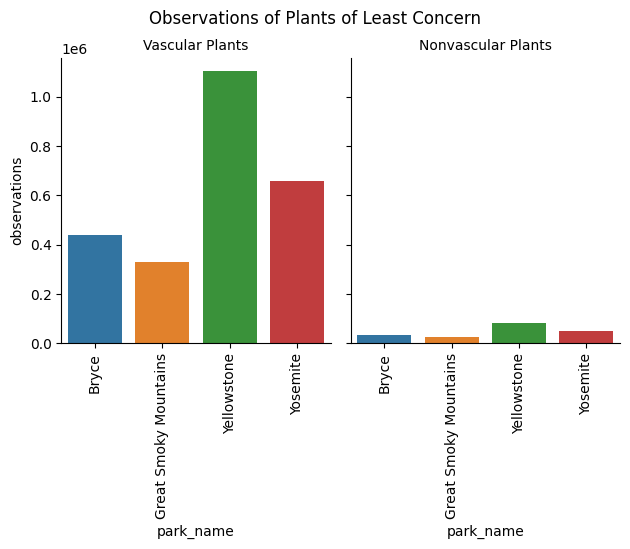

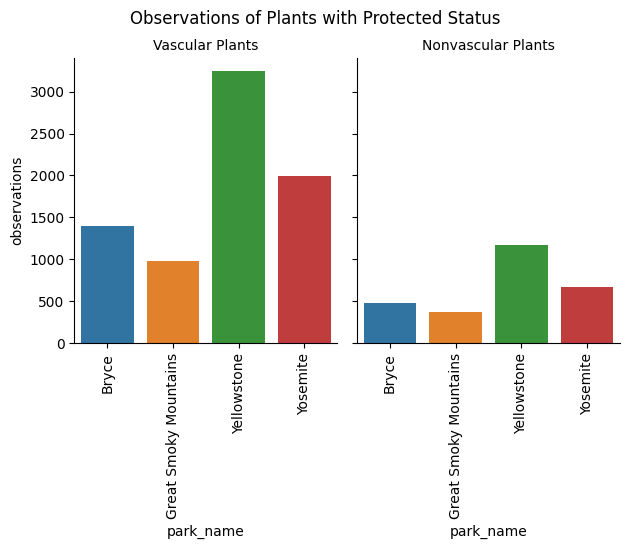

In [78]:
#For greater visibility into the protection status of relative groups of species and plants we can split into two dataframes, one for plants and one for animals.
#plants
biodiv_plants = biodiv[biodiv['category'].str.contains('Plant')].reset_index(drop=True)
biodiv_plants_gp_status= biodiv_plants.groupby(['conservation_status', 'protection_listing', 'category', 'park_name'], as_index=False)["observations"].sum()

g=sns.catplot(
    data = biodiv_plants_gp_status[biodiv_plants_gp_status['protection_listing']==0],
    x='park_name',
    y='observations',
    col = 'category',
    col_order = ['Vascular Plant', 'Nonvascular Plant'],
    kind = 'bar',
    errorbar= None,
    height = 4,
    aspect = .8,
)
h=sns.catplot(
    data = biodiv_plants_gp_status[biodiv_plants_gp_status['protection_listing']==1],
    x='park_name',
    y='observations',
    col = 'category',
    col_order = ['Vascular Plant', 'Nonvascular Plant'],
    kind = 'bar',
    errorbar= None,
    height = 4,
    aspect = 0.8
)
g.set_xticklabels(rotation = 90)
g.set_titles("{col_name}s")
g.fig.subplots_adjust(top=.86)
g.fig.suptitle('Observations of Plants of Least Concern')
h.set_xticklabels(rotation = 90)
h.set_titles("{col_name}s")
h.fig.subplots_adjust(top=.86)
h.fig.suptitle('Observations of Plants with Protected Status')
plt.show()
plt.close("all")

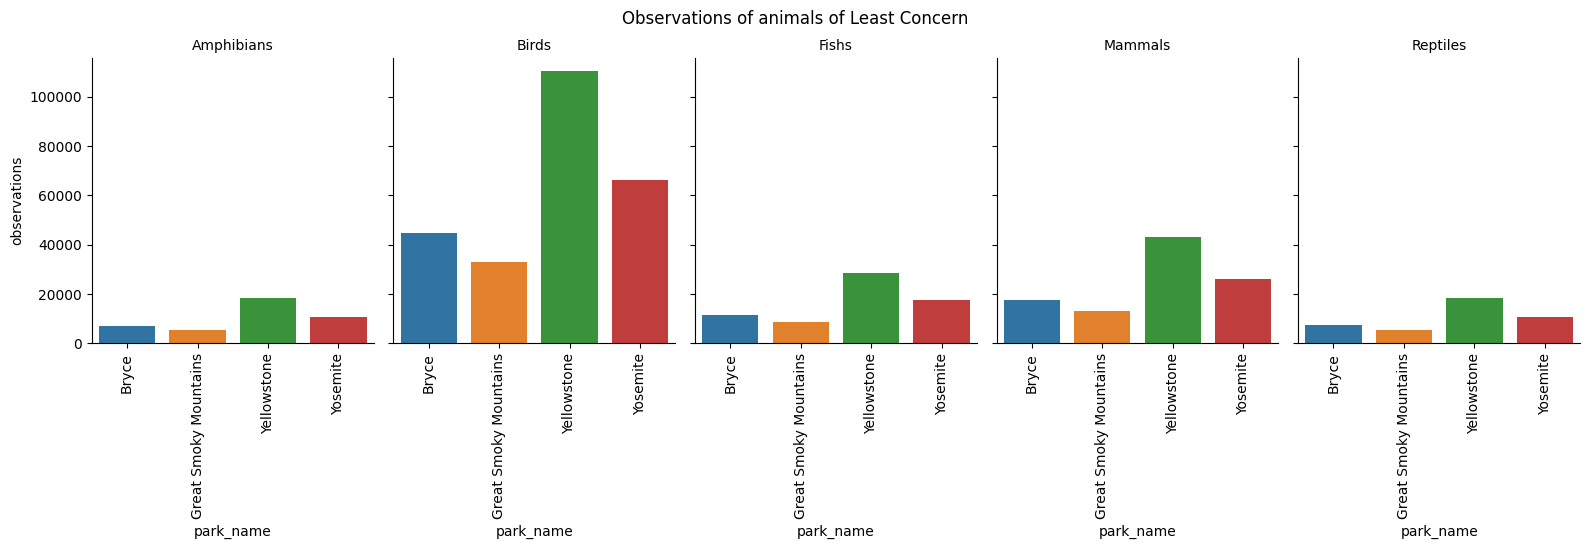

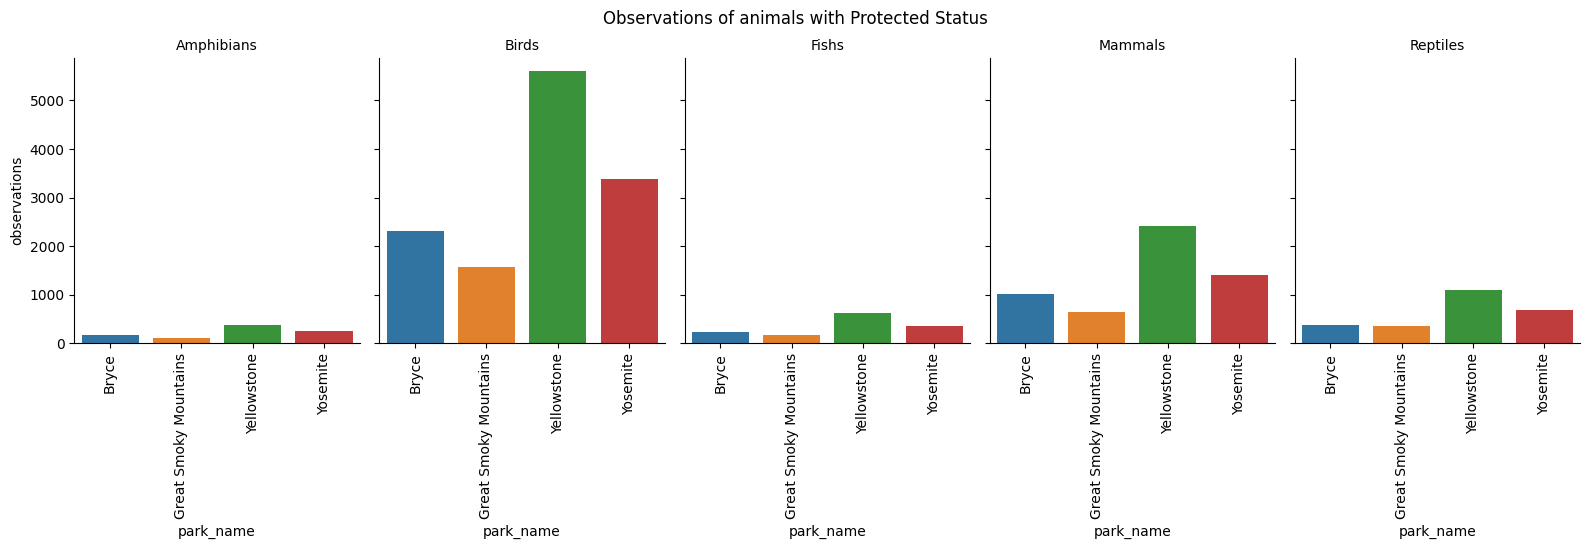

In [80]:
#For greater visibility into the protection status of relative groups of species and animals we can split into two dataframes, one for animals and one for animals.
#animals
biodiv_animals = biodiv[biodiv['category'].str.contains('Plant')==False].reset_index(drop=True)
biodiv_animals_gp_status= biodiv_animals.groupby(['conservation_status', 'protection_listing', 'category', 'park_name'], as_index=False)["observations"].sum()
category_order = list(biodiv_animals_gp_status.category.unique())
g=sns.catplot(
    data = biodiv_animals_gp_status[biodiv_animals_gp_status['protection_listing']==0],
    x='park_name',
    y='observations',
    col = 'category',
    #col_order = category_order,
    kind = 'bar',
    errorbar= None,
    height = 4,
    aspect = .8,
)
h=sns.catplot(
    data = biodiv_animals_gp_status[biodiv_animals_gp_status['protection_listing']==1],
    x='park_name',
    y='observations',
    col = 'category',
    #col_order = category_order,
    kind = 'bar',
    errorbar= None,
    height = 4,
    aspect = 0.8
)
g.set_xticklabels(rotation = 90)
g.set_titles("{col_name}s")
g.fig.subplots_adjust(top=.86)
g.fig.suptitle('Observations of animals of Least Concern')
h.set_xticklabels(rotation = 90)
h.set_titles("{col_name}s")
h.fig.subplots_adjust(top=.86)
h.fig.suptitle('Observations of animals with Protected Status')
plt.show()
plt.close("all")

We can see from these graphs that across the board Yellowstone records the highest average observation counts across all conservation status, which stands to reason given their relative sizes.  
Yellowstone = 2,221,766 acres
Yosemite = 747,956 acres
Great Smoky Mountains = 533,427 acres
Bryce 35,835 acres

I wonder which park sees the highest number of observations per acre?

In [46]:
#adding a column for park size
size_acres = {'Bryce': 35835, 'Great Smoky Mountains': 533427, 'Yosemite': 747956, 'Yellowstone':2221766}
biodiv['acres'] = biodiv['park_name'].apply(lambda x: size_acres.get(x))
print(biodiv.describe())
print('The average park size is '+str(biodiv.acres.mean())+' acres')
factor_acre= {}
for park, parksize in size_acres.items():
    print(str(park)+' has a size factor of x times the mean where x is: ')
    size_factor = round(parksize/(biodiv.acres.mean()),2)
    print(size_factor)
    factor_acre[park]=size_factor
biodiv['factor'] = biodiv['park_name'].apply(lambda x: factor_acre.get(x))
print(biodiv.describe())

       observations  protection_listing         acres
count  22164.000000        22164.000000  2.216400e+04
mean     149.450866            0.032305  8.847460e+05
std       81.206840            0.176812  8.140222e+05
min        9.000000            0.000000  3.583500e+04
25%       88.000000            0.000000  4.090290e+05
50%      129.000000            0.000000  6.406915e+05
75%      217.000000            0.000000  1.116408e+06
max      805.000000            1.000000  2.221766e+06
The average park size is 884746.0 acres
Bryce has a size factor of x times the mean where x is: 
0.04
Great Smoky Mountains has a size factor of x times the mean where x is: 
0.6
Yosemite has a size factor of x times the mean where x is: 
0.85
Yellowstone has a size factor of x times the mean where x is: 
2.51
       observations  protection_listing         acres        factor
count  22164.000000        22164.000000  2.216400e+04  22164.000000
mean     149.450866            0.032305  8.847460e+05      1.00000

In [49]:
biodiv_status_f = biodiv.drop(biodiv[biodiv['conservation_status']=='No Status'].index)
biodiv_stat_grouped_f = biodiv_status_f.groupby(['conservation_status', 'protected_listing', 'category', 'park_name', 'factor'], as_index=False)["observations"].sum()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x='protected_listing', y= (biodiv_stat_grouped_f['observations']/biodiv_stat_grouped_f['factor']), hue='category', data=biodiv_stat_grouped_f, showfliers=False)
plt.subplot(1,2,2)
sns.boxplot(x='protected_listing', y= (biodiv_stat_grouped_f['observations']/biodiv_stat_grouped_f['factor']), hue='park_name', data=biodiv_stat_grouped_f,showfliers=False)
plt.show()
plt.clf()

KeyError: 'protected_listing'

In [ ]:
biodiv_stat_grouped_g = biodiv.drop(biodiv[biodiv['protected_class']<2].index)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x='protected_class', y= (biodiv_stat_grouped_g['observations']/biodiv_stat_grouped_g['factor']), hue='category', data=biodiv_stat_grouped_g, showfliers=False)
plt.subplot(1,2,2)
sns.boxplot(x='protected_class', y= (biodiv_stat_grouped_g['observations']/biodiv_stat_grouped_g['factor']), hue='park_name', data=biodiv_stat_grouped_g, showfliers=False)
plt.show()
plt.close('all')

#### Analysis:

1) Is species category is correlated with it's conservation status?
2) Is National park correlated with observations counts or conservation status?
3) How are conservations status and observations correlated?

### Is species category correlated with conservation status?
- Method:
    - Group by species (scientific name) to meet independence of observation needed for Chi2
    - Split species into plant and animals for greater clarity.
    - Expected Contingency Tables for
    - Chi Squared
    - Cramér's V
- Analysis:
    - Discuss issue of 0's values in contingency table - to be a good candidate for Chi Squared analysis there should be fewer than 20% 0's in the table, though with a large dataset with strong tendencies we may find more. 
    - Plants show low Chi-squared with p-value of 0.8 -- Plants categories are likely not correlated with conservation status. ie, you're no more likely to see a Non-vascular than a Vascular plant with any particular conservation status. 
    - Animal categories vs conservation status show a high Chi-squared statistic (43.07), and low P-value (0.0003) indicating a statistically significant correlation between animal category and conservation status. 
    - Applying Cramér's V to the animal contingency and Chi2 shows a moderate, statistically significant, relationship across several variables, including Amphibian and Reptile and to a lesser degree, Fish. 
- Conclusion:
    There is some relationship between animal category and conservation status that is likely influenced by other variables. 

In [ ]:
biodiv_species = biodiv.groupby(['scientific_name', 'category', 'conservation_status'], as_index=False)['observations'].sum()
status_category_contingency = pd.crosstab(biodiv_species['conservation_status'],biodiv_species['category'])
print(f"Contingency table for Conservation Status vs Category:\n{status_category_contingency}")
chi2, pval, dof, expected = stats.chi2_contingency(status_category_contingency)
print(f"Chi-square Statistic - for plant and animal categories: {chi2}")
print(f"P-value - for plant and animal categories: {pval}")
print(f"Degrees of Freedom - for plant and animal categories: {dof}")

In [ ]:
#Calculate Cramér's V 
n = np.sum(status_category_contingency)
r,k = status_category_contingency.shape
cramers_v = np.sqrt(chi2/(n*min(k-1,r-1)))
print(f"Cramér's V: {cramers_v}")

In [ ]:
biodiv_plant_species = biodiv_species[biodiv_species['category'].isin(['Nonvascular Plant', 'Vascular Plant'])]
biodiv_animal_species = biodiv_species[biodiv_species['category'].isin(['Bird', 'Amphibian', 'Reptile', 'Mammal', 'Fish'])]

In [ ]:
plant_status_category_contingency = pd.crosstab(biodiv_plant_species['conservation_status'],biodiv_plant_species['category'])
print(f"Contingency table for Conservation Status vs Category - for Plants:\n{plant_status_category_contingency}")
chi2, pval, dof, expected = stats.chi2_contingency(plant_status_category_contingency)
print(f"Chi-square Statistic - for Plants: {chi2}")
print(f"P-value - for Plants: {pval}")
print(f"Degrees of Freedom - for Plants: {dof}")

In [ ]:
animal_status_category_contingency = pd.crosstab(biodiv_animal_species['conservation_status'],biodiv_animal_species['category'])
print(f"Contingency table for Conservation Status vs Category - for animals:\n{animal_status_category_contingency}")
chi2, pval, dof, expected = stats.chi2_contingency(animal_status_category_contingency)
print(f"Chi-square Statistic - for animals: {chi2}")
print(f"P-value - for animals: {pval}")
print(f"Degrees of Freedom - for animals: {dof}")

In [ ]:
#Calculate Cramér's V 
n = np.sum(animal_status_category_contingency)
r,k = animal_status_category_contingency.shape
cramers_v = np.sqrt(chi2/(n*min(k-1,r-1)))
print(f"Cramér's V: {cramers_v}")

Is National park correlated with observations counts?
- Method:
    - Assess Central Tendency
    - ANOVA
- Analysis:
- Conclusion:

In [ ]:
area_normed_observations = (biodiv['observations']/biodiv['factor'])
parks = list(biodiv['park_name'].unique())
num = 1
plt.figure(figsize=(8,16))
park_describe = {}
for park in parks:
    park_biodiv = biodiv[biodiv['park_name']==park]
    park_mean = park_biodiv['observations'].describe(include=all)
    park_describe[park]= park_mean
    plt.subplot(4,2,num)
    sns.histplot(park_biodiv['observations'])
    plt.title(park + ' Observations')
    num +=1
    plt.subplot(4,2,num)
    sns.boxplot(x='observations', data=park_biodiv)
    num +=1
plt.show()
plt.clf()
parks_describe_df = pd.DataFrame(park_describe)
print(parks_describe_df)

In [ ]:
#ANOVA using OLS- Ordinary Least Squares
model = sm.OLS.from_formula('observations~park_name', biodiv)
results = model.fit()
anova_table = sm.stats.anova_lm(results, typ=2)
print(f"ANOVA F and p value: \n {anova_table}")
print(f"Model Results Summary: \n{results.summary()}")
residuals = biodiv.observations-results.predict(biodiv)
plt.figure()
sns.histplot(residuals)
plt.title("Residuals Normality")
plt.show()
plt.clf()


How are conservations status and observations correlated?
- Method:
- Analysis:
- Conclusion:

#### Conclusion:
- Reprise questions and conclusions with a few key insights/applications.
- Raise any new questions or future work

#### Appendix:
- Technical Descriptions of unusual stats
- Detailed Tables, Computer output (not necessarily human friendly)
- Interesting or excessive figures
- Computer code used to obtain results. 